# Keras TF 2.0 - Classification Project

Let's explore a classification task with Keras API for TF 2.0

## The Data

### Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign

    :Summary Statistics:

    ===================================== ====== ======
                                           Min    Max
    ===================================== ====== ======
    radius (mean):                        6.981  28.11
    texture (mean):                       9.71   39.28
    perimeter (mean):                     43.79  188.5
    area (mean):                          143.5  2501.0
    smoothness (mean):                    0.053  0.163
    compactness (mean):                   0.019  0.345
    concavity (mean):                     0.0    0.427
    concave points (mean):                0.0    0.201
    symmetry (mean):                      0.106  0.304
    fractal dimension (mean):             0.05   0.097
    radius (standard error):              0.112  2.873
    texture (standard error):             0.36   4.885
    perimeter (standard error):           0.757  21.98
    area (standard error):                6.802  542.2
    smoothness (standard error):          0.002  0.031
    compactness (standard error):         0.002  0.135
    concavity (standard error):           0.0    0.396
    concave points (standard error):      0.0    0.053
    symmetry (standard error):            0.008  0.079
    fractal dimension (standard error):   0.001  0.03
    radius (worst):                       7.93   36.04
    texture (worst):                      12.02  49.54
    perimeter (worst):                    50.41  251.2
    area (worst):                         185.2  4254.0
    smoothness (worst):                   0.071  0.223
    compactness (worst):                  0.027  1.058
    concavity (worst):                    0.0    1.252
    concave points (worst):               0.0    0.291
    symmetry (worst):                     0.156  0.664
    fractal dimension (worst):            0.055  0.208
    ===================================== ====== ======

    :Missing Attribute Values: None

    :Class Distribution: 212 - Malignant, 357 - Benign

    :Creator:  Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian

    :Donor: Nick Street

    :Date: November, 1995

This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets.
https://goo.gl/U2Uwz2

Features are computed from a digitized image of a fine needle
aspirate (FNA) of a breast mass.  They describe
characteristics of the cell nuclei present in the image.

Separating plane described above was obtained using
Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree
Construction Via Linear Programming." Proceedings of the 4th
Midwest Artificial Intelligence and Cognitive Science Society,
pp. 97-101, 1992], a classification method which uses linear
programming to construct a decision tree.  Relevant features
were selected using an exhaustive search in the space of 1-4
features and 1-3 separating planes.

The actual linear program used to obtain the separating plane
in the 3-dimensional space is that described in:
[K. P. Bennett and O. L. Mangasarian: "Robust Linear
Programming Discrimination of Two Linearly Inseparable Sets",
Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:

ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

.. topic:: References

   - W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction 
     for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on 
     Electronic Imaging: Science and Technology, volume 1905, pages 861-870,
     San Jose, CA, 1993.
   - O.L. Mangasarian, W.N. Street and W.H. Wolberg. Breast cancer diagnosis and 
     prognosis via linear programming. Operations Research, 43(4), pages 570-577, 
     July-August 1995.
   - W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Machine learning techniques
     to diagnose breast cancer from fine-needle aspirates. Cancer Letters 77 (1994) 
     163-171.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('10_cancer_classification.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


## EDA

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

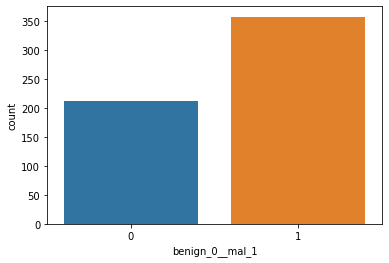

In [6]:
sns.countplot(x='benign_0__mal_1',data=df)

<AxesSubplot:>

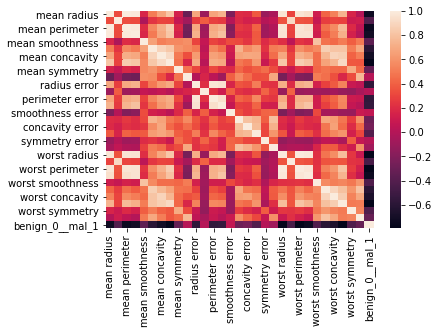

In [7]:
sns.heatmap(df.corr())

In [8]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

<AxesSubplot:>

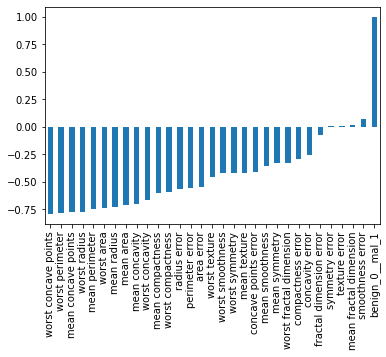

In [9]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

<AxesSubplot:>

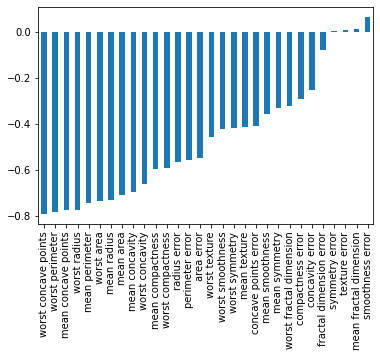

In [10]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

## Train Test Split

In [11]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)


## Scaling Data

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()

In [16]:
scaler.fit(X_train)

MinMaxScaler()

In [17]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Creating the Model

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
                  
    

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [19]:
X_train.shape

(426, 30)

In [20]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

model.add(Dense(units=30,activation='relu'))

model.add(Dense(units=15,activation='relu'))

model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

## Training the Model 

### Example One: Choosing too many epochs and overfitting!

In [21]:
%%time
# https://stats.stackexchange.com/questions/164876/tradeoff-batch-size-vs-number-of-iterations-to-train-a-neural-network
# https://datascience.stackexchange.com/questions/18414/are-there-any-rules-for-choosing-the-size-of-a-mini-batch

model.fit(x=X_train, 
          y=y_train, 
          epochs=200,
          validation_data=(X_test, y_test), verbose=1
          )

Epoch 1/200
14/14 [==============================] - 1s 49ms/step - loss: 0.6719 - val_loss: 0.6559
Epoch 2/200
14/14 [==============================] - 0s 14ms/step - loss: 0.6415 - val_loss: 0.6225
Epoch 3/200
14/14 [==============================] - 0s 9ms/step - loss: 0.6014 - val_loss: 0.5742
Epoch 4/200
14/14 [==============================] - 0s 9ms/step - loss: 0.5536 - val_loss: 0.5216
Epoch 5/200
14/14 [==============================] - 0s 9ms/step - loss: 0.5003 - val_loss: 0.4648
Epoch 6/200
14/14 [==============================] - 0s 9ms/step - loss: 0.4417 - val_loss: 0.4017
Epoch 7/200
14/14 [==============================] - 0s 8ms/step - loss: 0.3862 - val_loss: 0.3431
Epoch 8/200
14/14 [==============================] - 0s 9ms/step - loss: 0.3318 - val_loss: 0.2927
Epoch 9/200
14/14 [==============================] - 0s 9ms/step - loss: 0.2877 - val_loss: 0.2548
Epoch 10/200
14/14 [==============================] - 0s 9ms/step - loss: 0.2482 - val_loss: 0.2181
Epoch 1

Epoch 83/200
14/14 [==============================] - 0s 8ms/step - loss: 0.0352 - val_loss: 0.1403
Epoch 84/200
14/14 [==============================] - 0s 8ms/step - loss: 0.0443 - val_loss: 0.1268
Epoch 85/200
14/14 [==============================] - 0s 8ms/step - loss: 0.0349 - val_loss: 0.1342
Epoch 86/200
14/14 [==============================] - 0s 8ms/step - loss: 0.0344 - val_loss: 0.1429
Epoch 87/200
14/14 [==============================] - 0s 8ms/step - loss: 0.0351 - val_loss: 0.1460
Epoch 88/200
14/14 [==============================] - 0s 8ms/step - loss: 0.0362 - val_loss: 0.1424
Epoch 89/200
14/14 [==============================] - 0s 8ms/step - loss: 0.0334 - val_loss: 0.1267
Epoch 90/200
14/14 [==============================] - 0s 8ms/step - loss: 0.0381 - val_loss: 0.1483
Epoch 91/200
14/14 [==============================] - 0s 8ms/step - loss: 0.0351 - val_loss: 0.1393
Epoch 92/200
14/14 [==============================] - 0s 8ms/step - loss: 0.0329 - val_loss: 0.1391


14/14 [==============================] - 0s 8ms/step - loss: 0.0249 - val_loss: 0.1779
Epoch 165/200
14/14 [==============================] - 0s 9ms/step - loss: 0.0222 - val_loss: 0.1873
Epoch 166/200
14/14 [==============================] - 0s 8ms/step - loss: 0.0168 - val_loss: 0.1723
Epoch 167/200
14/14 [==============================] - 0s 8ms/step - loss: 0.0217 - val_loss: 0.1712
Epoch 168/200
14/14 [==============================] - 0s 8ms/step - loss: 0.0306 - val_loss: 0.1856
Epoch 169/200
14/14 [==============================] - 0s 8ms/step - loss: 0.0227 - val_loss: 0.2118
Epoch 170/200
14/14 [==============================] - 0s 8ms/step - loss: 0.0202 - val_loss: 0.1645
Epoch 171/200
14/14 [==============================] - 0s 9ms/step - loss: 0.0172 - val_loss: 0.1954
Epoch 172/200
14/14 [==============================] - 0s 8ms/step - loss: 0.0152 - val_loss: 0.1683
Epoch 173/200
14/14 [==============================] - 0s 9ms/step - loss: 0.0159 - val_loss: 0.1811
Epoc

In [22]:
# model.history.history

In [23]:
model_loss = pd.DataFrame(model.history.history)

In [24]:
# model_loss

<AxesSubplot:>

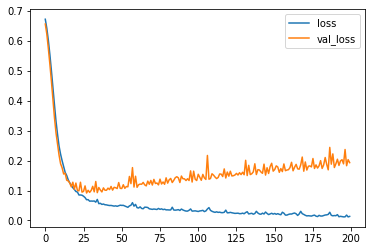

In [25]:
model_loss.plot()

## Example Two: Early Stopping

We obviously trained too much! Let's use early stopping to track the val_loss and stop training once it begins increasing too much!

In [26]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [27]:
from tensorflow.keras.callbacks import EarlyStopping

Stop training when a monitored quantity has stopped improving.

    Arguments:
        monitor: Quantity to be monitored.
        min_delta: Minimum change in the monitored quantity
            to qualify as an improvement, i.e. an absolute
            change of less than min_delta, will count as no
            improvement.
        patience: Number of epochs with no improvement
            after which training will be stopped.
        verbose: verbosity mode.
        mode: One of `{"auto", "min", "max"}`. In `min` mode,
            training will stop when the quantity
            monitored has stopped decreasing; in `max`
            mode it will stop when the quantity
            monitored has stopped increasing; in `auto`
            mode, the direction is automatically inferred
            from the name of the monitored quantity.

In [28]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [29]:
%%time
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
14/14 [==============================] - 0s 28ms/step - loss: 0.6743 - val_loss: 0.6495
Epoch 2/600
14/14 [==============================] - 0s 10ms/step - loss: 0.6294 - val_loss: 0.6047
Epoch 3/600
14/14 [==============================] - 0s 8ms/step - loss: 0.5830 - val_loss: 0.5508
Epoch 4/600
14/14 [==============================] - 0s 8ms/step - loss: 0.5301 - val_loss: 0.4970
Epoch 5/600
14/14 [==============================] - 0s 9ms/step - loss: 0.4788 - val_loss: 0.4409
Epoch 6/600
14/14 [==============================] - 0s 11ms/step - loss: 0.4256 - val_loss: 0.3926
Epoch 7/600
14/14 [==============================] - 0s 9ms/step - loss: 0.3781 - val_loss: 0.3434
Epoch 8/600
14/14 [==============================] - 0s 13ms/step - loss: 0.3354 - val_loss: 0.3026
Epoch 9/600
14/14 [==============================] - 0s 14ms/step - loss: 0.3011 - val_loss: 0.2683
Epoch 10/600
14/14 [==============================] - 0s 11ms/step - loss: 0.2698 - val_loss: 0.2415
Epo

<AxesSubplot:>

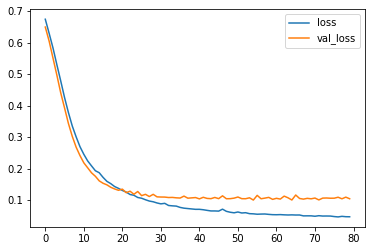

In [30]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

# EFFECT AFTER HYPERPRAMETER TUNE:

In [31]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=7,activation='relu')) # Add another hidden layer
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [33]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)


model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
14/14 [==============================] - 0s 27ms/step - loss: 0.6889 - val_loss: 0.6707
Epoch 2/600
14/14 [==============================] - 0s 11ms/step - loss: 0.6600 - val_loss: 0.6331
Epoch 3/600
14/14 [==============================] - 0s 11ms/step - loss: 0.6094 - val_loss: 0.5767
Epoch 4/600
14/14 [==============================] - 0s 11ms/step - loss: 0.5574 - val_loss: 0.5167
Epoch 5/600
14/14 [==============================] - 0s 11ms/step - loss: 0.4958 - val_loss: 0.4521
Epoch 6/600
14/14 [==============================] - 0s 10ms/step - loss: 0.4321 - val_loss: 0.3843
Epoch 7/600
14/14 [==============================] - 0s 9ms/step - loss: 0.3685 - val_loss: 0.3221
Epoch 8/600
14/14 [==============================] - 0s 9ms/step - loss: 0.3138 - val_loss: 0.2687
Epoch 9/600
14/14 [==============================] - 0s 9ms/step - loss: 0.2715 - val_loss: 0.2342
Epoch 10/600
14/14 [==============================] - 0s 8ms/step - loss: 0.2378 - val_loss: 0.2021
Epo

<AxesSubplot:>

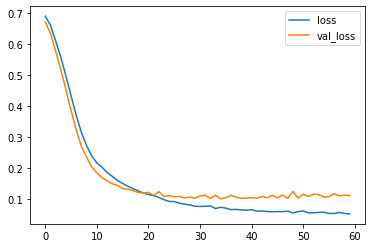

In [34]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [37]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=7,activation='relu')) # Add another hidden layer
model.add(Dense(units=7,activation='relu')) # Add another hidden layer
model.add(Dense(units=7,activation='relu')) # Add another hidden layer

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [38]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)


model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
14/14 [==============================] - 0s 29ms/step - loss: 0.6849 - val_loss: 0.6701
Epoch 2/600
14/14 [==============================] - 0s 9ms/step - loss: 0.6589 - val_loss: 0.6437
Epoch 3/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6301 - val_loss: 0.6118
Epoch 4/600
14/14 [==============================] - 0s 9ms/step - loss: 0.5944 - val_loss: 0.5756
Epoch 5/600
14/14 [==============================] - 0s 10ms/step - loss: 0.5550 - val_loss: 0.5303
Epoch 6/600
14/14 [==============================] - 0s 13ms/step - loss: 0.5083 - val_loss: 0.4837
Epoch 7/600
14/14 [==============================] - 0s 11ms/step - loss: 0.4610 - val_loss: 0.4326
Epoch 8/600
14/14 [==============================] - 0s 10ms/step - loss: 0.4076 - val_loss: 0.3795
Epoch 9/600
14/14 [==============================] - 0s 12ms/step - loss: 0.3501 - val_loss: 0.3133
Epoch 10/600
14/14 [==============================] - 0s 8ms/step - loss: 0.2898 - val_loss: 0.2550
Epo

<AxesSubplot:>

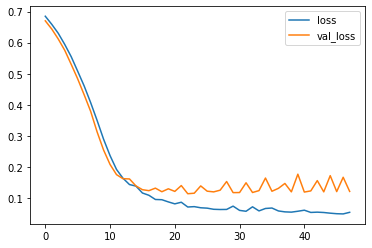

In [39]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

## Example Three: Adding in DropOut Layers

In [40]:
from tensorflow.keras.layers import Dropout

In [41]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [42]:
%%time
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
14/14 [==============================] - 0s 16ms/step - loss: 0.7096 - val_loss: 0.6547
Epoch 2/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6614 - val_loss: 0.6336
Epoch 3/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6549 - val_loss: 0.6147
Epoch 4/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6246 - val_loss: 0.5930
Epoch 5/600
14/14 [==============================] - 0s 21ms/step - loss: 0.6175 - val_loss: 0.5716
Epoch 6/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5952 - val_loss: 0.5472
Epoch 7/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5638 - val_loss: 0.5100
Epoch 8/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5390 - val_loss: 0.4729
Epoch 9/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5095 - val_loss: 0.4378
Epoch 10/600
14/14 [==============================] - 0s 7ms/step - loss: 0.4943 - val_loss: 0.4039
Epoch 1

Epoch 83/600
14/14 [==============================] - 0s 7ms/step - loss: 0.1074 - val_loss: 0.0894
Epoch 84/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0909 - val_loss: 0.1036
Epoch 85/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0898 - val_loss: 0.0851
Epoch 86/600
14/14 [==============================] - 0s 7ms/step - loss: 0.1033 - val_loss: 0.0849
Epoch 87/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0855 - val_loss: 0.1018
Epoch 88/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0976 - val_loss: 0.0943
Epoch 89/600
14/14 [==============================] - 0s 6ms/step - loss: 0.1222 - val_loss: 0.0917
Epoch 90/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0969 - val_loss: 0.0889
Epoch 91/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0961 - val_loss: 0.0886
Epoch 92/600
14/14 [==============================] - 0s 7ms/step - loss: 0.1128 - val_loss: 0.0919


<AxesSubplot:>

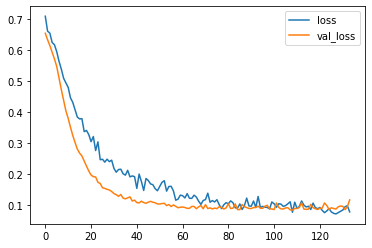

In [43]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

# Model Evaluation

In [44]:
predictions = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [45]:
from sklearn.metrics import classification_report,confusion_matrix

In [46]:
# https://en.wikipedia.org/wiki/Precision_and_recall
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94        55
           1       0.99      0.93      0.96        88

    accuracy                           0.95       143
   macro avg       0.94      0.96      0.95       143
weighted avg       0.95      0.95      0.95       143



In [47]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 6 82]]


In [48]:
# Changing hyperparameter
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [49]:
%%time
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
14/14 [==============================] - 0s 14ms/step - loss: 0.6930 - val_loss: 0.6776
Epoch 2/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6759 - val_loss: 0.6492
Epoch 3/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6461 - val_loss: 0.6200
Epoch 4/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6088 - val_loss: 0.5817
Epoch 5/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5775 - val_loss: 0.5343
Epoch 6/600
14/14 [==============================] - 0s 25ms/step - loss: 0.5363 - val_loss: 0.4835
Epoch 7/600
14/14 [==============================] - 0s 7ms/step - loss: 0.4984 - val_loss: 0.4291
Epoch 8/600
14/14 [==============================] - 0s 7ms/step - loss: 0.4291 - val_loss: 0.3703
Epoch 9/600
14/14 [==============================] - 0s 8ms/step - loss: 0.3946 - val_loss: 0.3168
Epoch 10/600
14/14 [==============================] - 0s 7ms/step - loss: 0.3552 - val_loss: 0.2772
Epoch 1

<AxesSubplot:>

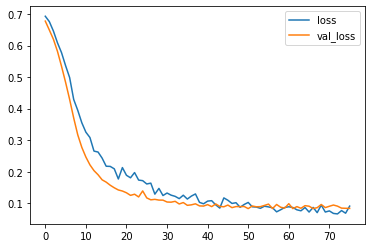

In [50]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()